In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [204]:
# path로 인한 한글폰트 
#import matplotlib.font_manager as fm

#font_path = r'C:\Users\MIN\Desktop\study\three_weeks_project\coronavirusdataset\NanumFontSetup_TTF_BARUNGOTHIC\NanumBarunGothic.ttf'
#fontprop = fm.FontProperties(fname=font_path, size=18)

In [205]:
# 한글폰트
from matplotlib import font_manager, rc           
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [206]:
df_trend = pd.read_csv(r"./coronavirusdataset/SearchTrend.csv")
df_time = pd.read_csv(r"./coronavirusdataset/Time.csv")

In [207]:
df_trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [208]:
df_time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [209]:
df_trend.tail()

,date,cold,flu,pneumonia,coronavirus
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698
1612,2020-05-31,0.11990,0.03499,0.08436,3.25944


In [210]:
df_time.tail()

,date,time,test,negative,confirmed,released,deceased
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269
132,2020-05-31,0,910822,876060,11468,10405,270


In [211]:
df_trend["corona"] = df_trend["coronavirus"] * 100
df_trend

,date,cold,flu,pneumonia,coronavirus,corona
0,2016-01-01,0.11663,0.05590,0.15726,0.00736,0.736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890,0.890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845,0.845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145,1.145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381,1.381
...,...,...,...,...,...,...
1608,2020-05-27,0.11326,0.05254,0.13017,3.93397,393.397
1609,2020-05-28,0.12081,0.04581,0.13890,5.55656,555.656
1610,2020-05-29,0.16454,0.04599,0.11699,4.95803,495.803
1611,2020-05-30,0.12208,0.03299,0.09090,3.41698,341.698


In [212]:
df_trend.shape

(1613, 6)

In [213]:
df_time.shape

(133, 7)

In [214]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1613 non-null   object 
 1   cold         1613 non-null   float64
 2   flu          1613 non-null   float64
 3   pneumonia    1613 non-null   float64
 4   coronavirus  1613 non-null   float64
 5   corona       1613 non-null   float64
dtypes: float64(5), object(1)
memory usage: 75.7+ KB


In [215]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [217]:
# 확진자 리스트와 감염경로 리스트
# 날짜 문자열로 변환
time_time=list(df_time['date'].apply(lambda x: str(x)))
trend_time=list(df_trend['date'].apply(lambda x: str(x)))

In [218]:
type(time_time[0])

str

In [223]:
# 누적확진자 정보로 신규확진자 데이터 만들기
test_new_list = []
for i in range(len(df_time['test'])):
    if i == 0:
        test_new_list.append(df_time['test'][0])
    else:
        j = df_time['test'][i] - df_time['test'][i-1]
        test_new_list.append(j)

In [224]:
# dataframe에 추가
df_time["test_new"] = test_new_list

In [225]:
df_time

,date,time,test,negative,confirmed,released,deceased,test_new
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,0
2,2020-01-22,16,4,3,1,0,0,3
3,2020-01-23,16,22,21,1,0,0,18
4,2020-01-24,16,27,25,2,0,0,5
...,...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269,13401
129,2020-05-28,0,868666,834952,11344,10340,269,15790
130,2020-05-29,0,885120,849161,11402,10363,269,16454
131,2020-05-30,0,902901,865162,11441,10398,269,17781


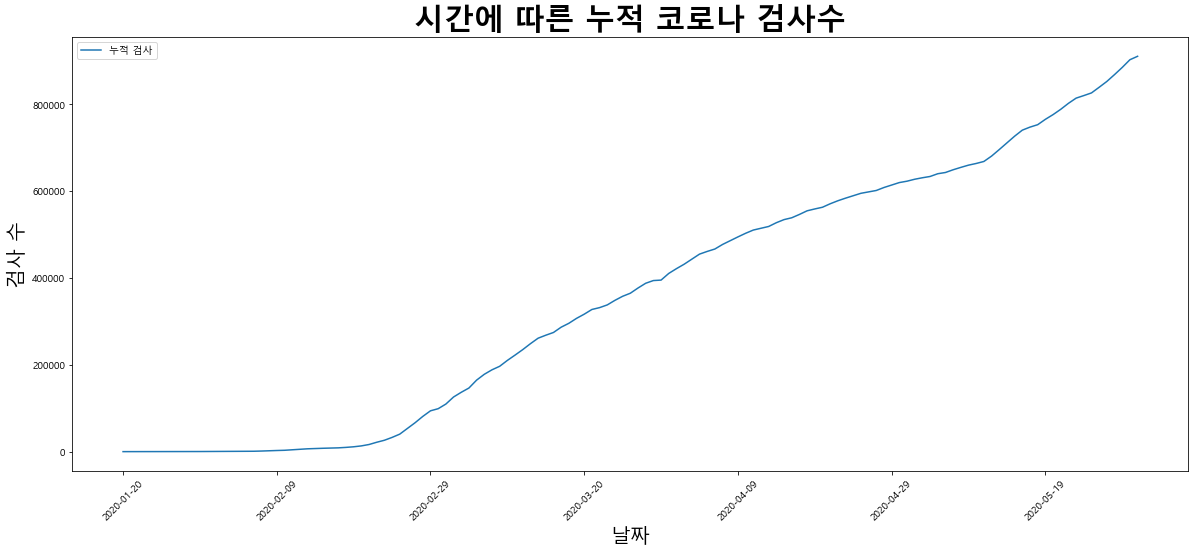

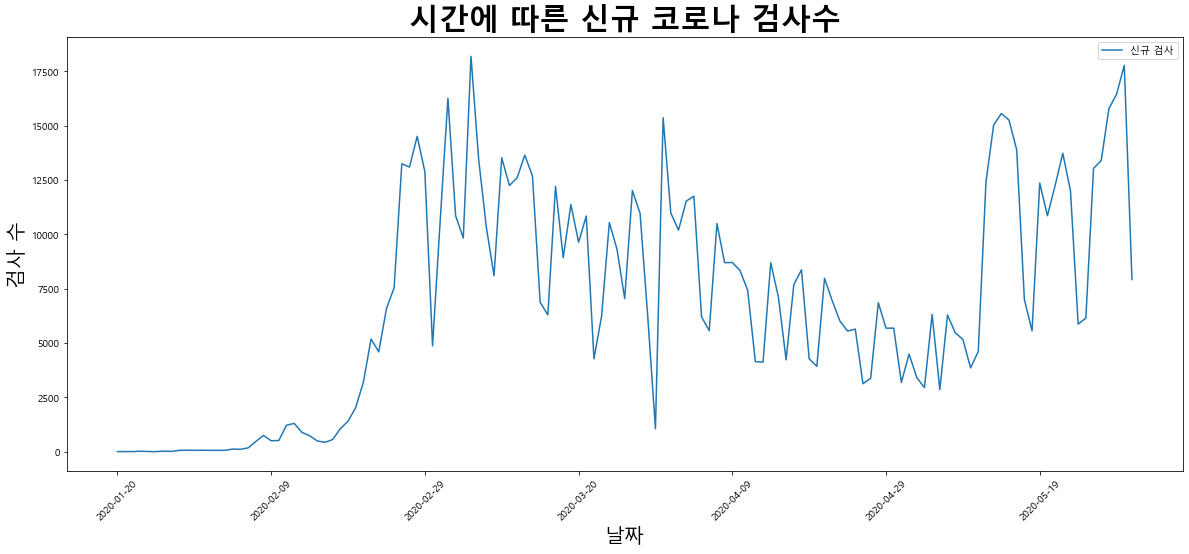

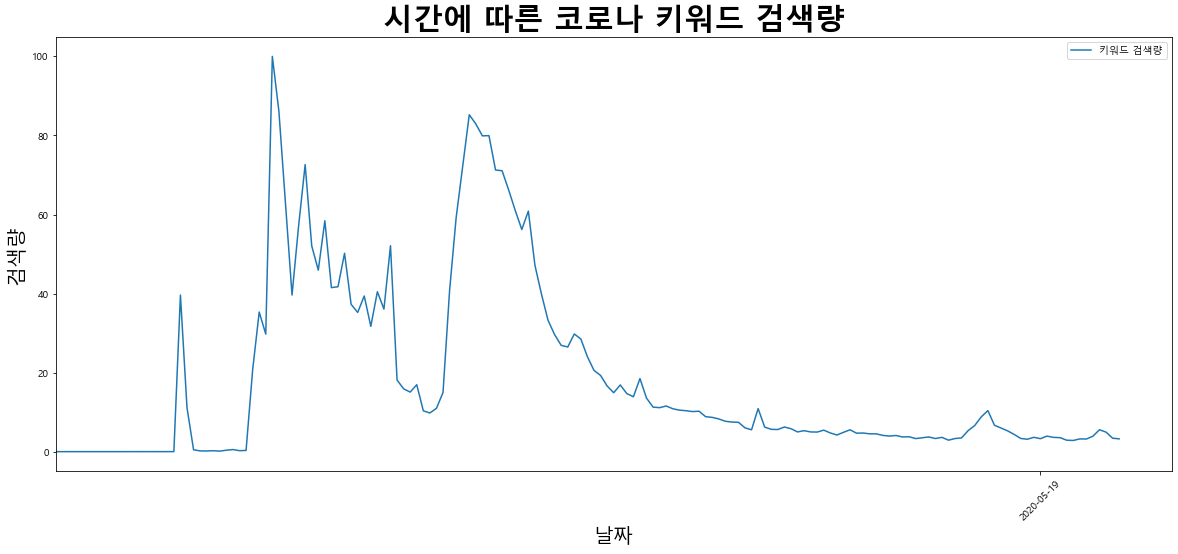

In [260]:
ax1 = df_time.plot(kind="line", x="date", y="test", label="누적 검사", rot=45, figsize=(20,8))
ax1.set_title("시간에 따른 누적 코로나 검사수", fontsize=30, fontweight="bold")
ax1.set_xlabel("날짜", fontsize=20)
ax1.set_ylabel("검사 수", fontsize=20)

ax2 = df_time.plot(kind="line", x="date", y="test_new", label="신규 검사", rot=45, figsize=(20,8))
ax2.set_title("시간에 따른 신규 코로나 검사수", fontsize=30, fontweight="bold")
ax2.set_xlabel("날짜", fontsize=20)
ax2.set_ylabel("검사 수", fontsize=20)

ax3 = df_trend.plot(kind="line", x="date", y="coronavirus", label="키워드 검색량", rot=45, figsize=(20,8))
ax3.set_xlim(1450, 1620)
ax3.set_title("시간에 따른 코로나 키워드 검색량", fontsize=30, fontweight="bold")
ax3.set_xlabel("날짜", fontsize=20)
ax3.set_ylabel("검색량", fontsize=20)

plt.show()

In [238]:
df_trend_date = []
df_trend_keyword = []
for i in range(1480,1613):
    x = df_trend["date"][i]
    y = df_trend["coronavirus"][i]
    df_trend_date.append(x)
    df_trend_keyword.append(y)
df_trend_date
df_trend_keyword

[20.6961,
 35.332840000000004,
 29.744740000000004,
 100.0,
 86.11541,
 62.84846999999999,
 39.627720000000004,
 57.074459999999995,
 72.63073,
 52.06261,
 45.93889,
 58.4187,
 41.5073,
 41.736470000000004,
 50.1994,
 37.288059999999994,
 35.230940000000004,
 39.3959,
 31.71404,
 40.46614,
 36.07691,
 52.11234,
 18.13918,
 15.909970000000001,
 15.08472,
 16.94803,
 10.34468,
 9.79906,
 10.98521,
 14.97945,
 40.759859999999996,
 59.21885,
 72.15665,
 85.23907,
 82.90014000000001,
 79.89478000000001,
 79.95441,
 71.26268,
 71.07204,
 66.20619,
 61.040530000000004,
 56.20421999999999,
 60.86853000000001,
 47.17367,
 39.84053,
 33.24218,
 29.61647,
 26.90492,
 26.4902,
 29.792279999999998,
 28.495140000000003,
 24.02346,
 20.56511,
 19.29851,
 16.625770000000003,
 14.92164,
 16.8914,
 14.708279999999998,
 13.9044,
 18.50553,
 13.56359,
 11.28111,
 11.1433,
 11.56656,
 10.87394,
 10.51795,
 10.38105,
 10.15869,
 10.25105,
 8.86464,
 8.6911,
 8.30075,
 7.709219999999999,
 7.50622,
 7.4474100

In [237]:
len(df_trend_date)

133

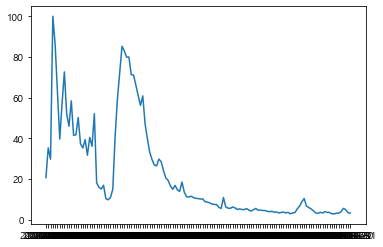

In [252]:
#131
date_new = range(133)
date_new_labels = df_trend_date
date_new_value = df_trend_keyword

plt.plot(date_new, date_new_value)

ax = plt.subplot()
ax.set_xticks(date_new)
ax.set_xticklabels(date_new_labels)

plt.show()